In [2]:
#import os
#len(os.listdir("D:\Tree_Species_Dataset"))
#from google.colab import drive
#drive.mount('/content/drive')

#import pandas as pd
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tree_Species_Dataset')

In [3]:
import os
import glob

repo_path = "/content/drive/MyDrive/Colab Notebooks/Tree_Species_Dataset"

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [4]:

import pandas as pd

repo_path = "/content/drive/MyDrive/Colab Notebooks/Tree_Species_Dataset"
class_dirs = os.listdir(repo_path)

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])

print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ", class_counts_df.shape)

            Image Count
other               150
saptaparni           50
shirish              50
sugarcane            50
sonmahor             50
shape:  (31, 1)


# New Section

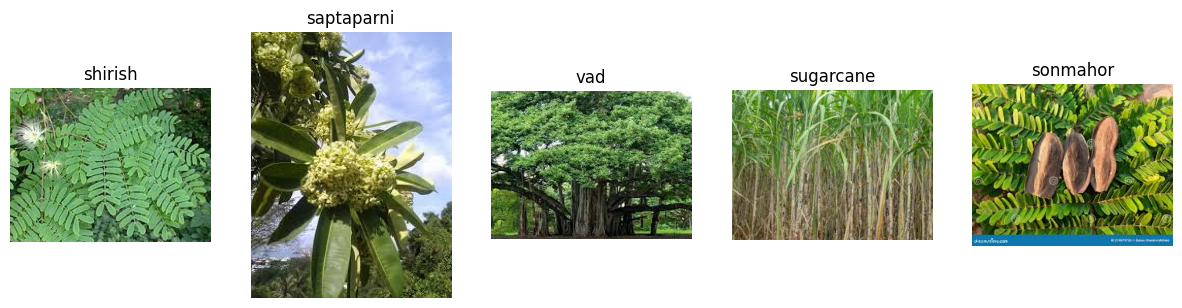

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [6]:
#from PIL import Image
#import os
#import pandas as pd

image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except:
            pass  # silently skip unreadable/corrupt images

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,256,197
1,194,259
2,225,225
3,209,242
4,275,183


In [8]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [12]:
import os
import hashlib
from collections import defaultdict

# Change this to your actual folder name in Drive
repo_path = "/content/drive/MyDrive/Colab Notebooks/Tree_Species_Dataset"

hashes = defaultdict(list)

for class_dir in os.listdir(repo_path):
    class_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)
            except:
                pass  # silently ignore unreadable files

# Only show final result
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [13]:
import os
corrupt_images = []
removed_count = 0
for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))
#os.remove(img_path)

Corrupted images: 5


Duplicate set 1:


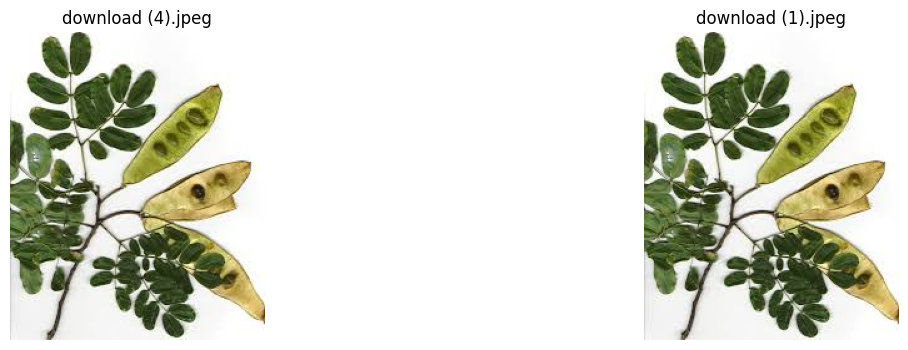

Duplicate set 2:


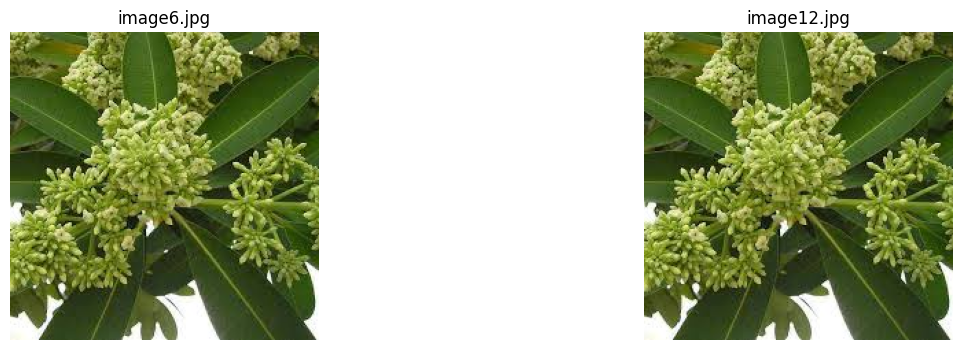

Duplicate set 3:


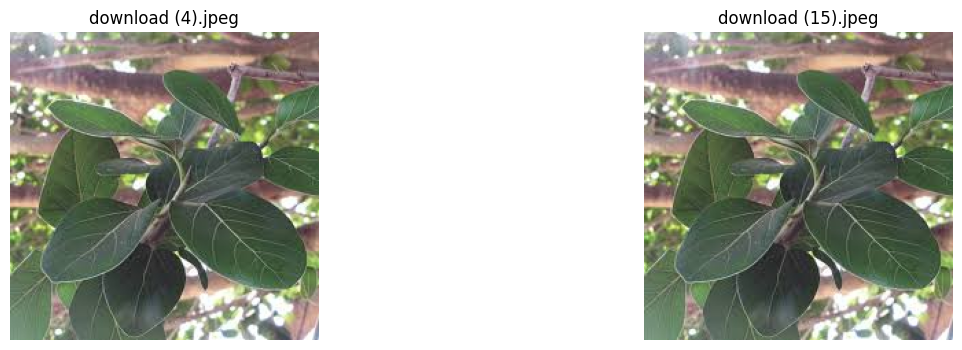

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [15]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [16]:
hashes = defaultdict(list)

for class_dir in os.listdir(repo_path):
    class_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)
            except:
                pass  # silently ignore any error

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [17]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


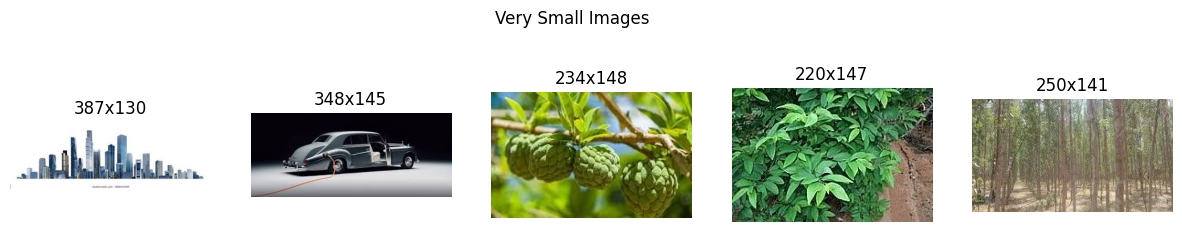

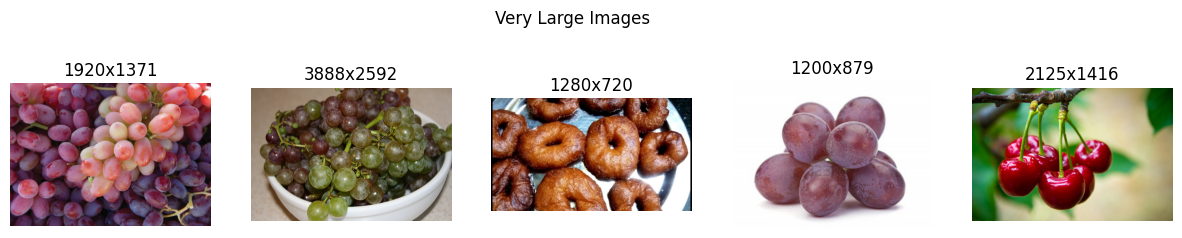

In [18]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [19]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [20]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())
# torture the data until it reveals everything

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


Processing class 'shirish' with 49 images...
Processing class 'saptaparni' with 49 images...
Processing class 'vad' with 49 images...
Processing class 'sugarcane' with 50 images...
Processing class 'sonmahor' with 49 images...
Processing class 'pipal' with 46 images...
Processing class 'simlo' with 36 images...
Processing class 'other' with 125 images...
Processing class 'sitafal' with 44 images...
Processing class 'pilikaren' with 46 images...
Processing class 'nilgiri' with 44 images...
Processing class 'neem' with 50 images...
Processing class 'motichanoti' with 46 images...
Processing class 'mango' with 44 images...
Processing class 'khajur' with 49 images...
Processing class 'kesudo' with 40 images...
Processing class 'kanchan' with 47 images...
Processing class 'jamun' with 46 images...
Processing class 'gunda' with 49 images...
Processing class 'gulmohor' with 43 images...
Processing class 'garmalo' with 42 images...
Processing class 'coconut' with 49 images...
Processing class 

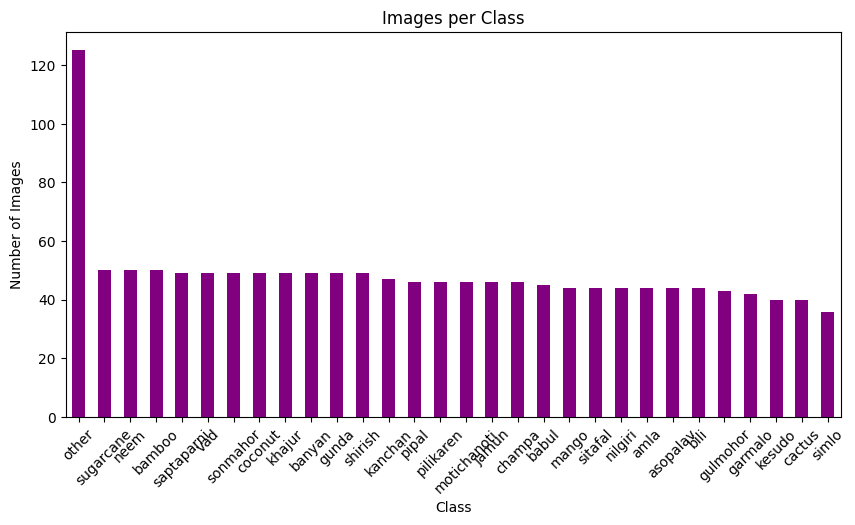

Image sizes vary significantly. Preprocessing images...
Preprocessed images saved to /content/drive/MyDrive/Colab Notebooks/Tree_Species_Dataset


In [22]:
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

def analyze_images(repo_path):
    """
    Analyzes image sizes and class distribution.
    """
    class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]
    image_info = []
    corrupted_files = []

    for class_dir in class_dirs:
        class_path = os.path.join(repo_path, class_dir)
        img_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"Processing class '{class_dir}' with {len(img_files)} images...")
        for img_file in img_files:
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_info.append({
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'class': class_dir
                    })
            except Exception as e:
                corrupted_files.append(img_path)

    df_sizes = pd.DataFrame(image_info)
    print("\nImage Size Statistics:")
    print(df_sizes[['width', 'height']].describe())
    print(f"\nCorrupted files: {len(corrupted_files)}")
    if corrupted_files:
        print("Sample corrupted files:", corrupted_files[:5])

    plt.figure(figsize=(10, 5))
    df_sizes['class'].value_counts().plot(kind='bar', color='purple')
    plt.title('Images per Class')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

    return df_sizes, corrupted_files

def preprocess_images(repo_path, output_dir):
    """
    Resizes images to 224x224 with aspect ratio preservation.
    """
    os.makedirs(output_dir, exist_ok=True)
    class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]
    for class_dir in class_dirs:
        class_path = os.path.join(repo_path, class_dir)
        output_class_dir = os.path.join(output_dir, class_dir)
        os.makedirs(output_class_dir, exist_ok=True)
        img_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        for img_file in img_files:
            img_path = os.path.join(class_path, img_file)
            output_path = os.path.join(output_class_dir, img_file)
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img.thumbnail((224, 224), Image.Resampling.LANCZOS)
                    new_img = Image.new('RGB', (224, 224), (0, 0, 0))
                    offset = ((224 - img.width) // 2, (224 - img.height) // 2)
                    new_img.paste(img, offset)
                    new_img.save(output_path, quality=95)
            except Exception as e:
                print(f"Error preprocessing {img_path}: {e}")
    print(f"Preprocessed images saved to {output_dir}")

# Run analysis and preprocessing
repo_path = "/content/drive/MyDrive/Colab Notebooks/Tree_Species_Dataset"
df_sizes, corrupted_files = analyze_images(repo_path)
if df_sizes['width'].std() > 50 or df_sizes['height'].std() > 50:
    print("Image sizes vary significantly. Preprocessing images...")
    preprocessed_dir = "/content/drive/MyDrive/Colab Notebooks/Tree_Species_Dataset"
    preprocess_images(repo_path, preprocessed_dir)
    data_dir = preprocessed_dir
else:
    print("Image sizes are consistent. Using original dataset.")
    data_dir = repo_path

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import os

# Set image dimensions and batch size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

def create_data_generators(data_dir, validation_split=0.2):
    """
    Creates data generators for training and validation for tree species dataset.
    Training data is augmented; validation data is only rescaled.
    """
    if not os.path.exists(data_dir):
        print(f"Error: Dataset directory not found at {data_dir}")
        return None, None, None

    # Training data with augmentation tailored for tree species
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.15,
        shear_range=0.1,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest',
        validation_split=validation_split
    )

    # Validation data (no augmentation)
    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=validation_split
    )

    print("Setting up training data generator...")
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    print("Setting up validation data generator...")
    val_generator = val_datagen.flow_from_directory(
        data_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    # Compute class weights
    print("Computing class weights...")
    if train_generator.samples == 0:
        print("Warning: No training samples found.")
        class_weights = {}
    else:
        classes = np.unique(train_generator.classes)
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=classes,
            y=train_generator.classes
        )
        class_weights = dict(zip(classes, class_weights))

    # Visualize class distribution
    print("Visualizing class distribution...")
    class_counts = np.bincount(train_generator.classes)
    class_names = [name for name, idx in sorted(train_generator.class_indices.items(), key=lambda x: x[1])]

    plt.figure(figsize=(10, 5))
    plt.bar(class_names, class_counts)
    plt.title('Class Distribution in Training Set')
    plt.xlabel('Tree Species')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"Class weights: {class_weights}")
    print(f"Training samples: {train_generator.samples}")
    print(f"Validation samples: {val_generator.samples}")

    return train_generator, val_generator, class_weights

Enhanced Tree Species CNN Training Script
Loading data...
Setting up training data generator...
Found 1177 images belonging to 31 classes.
Setting up validation data generator...
Found 277 images belonging to 31 classes.
Computing class weights...
Visualizing class distribution...


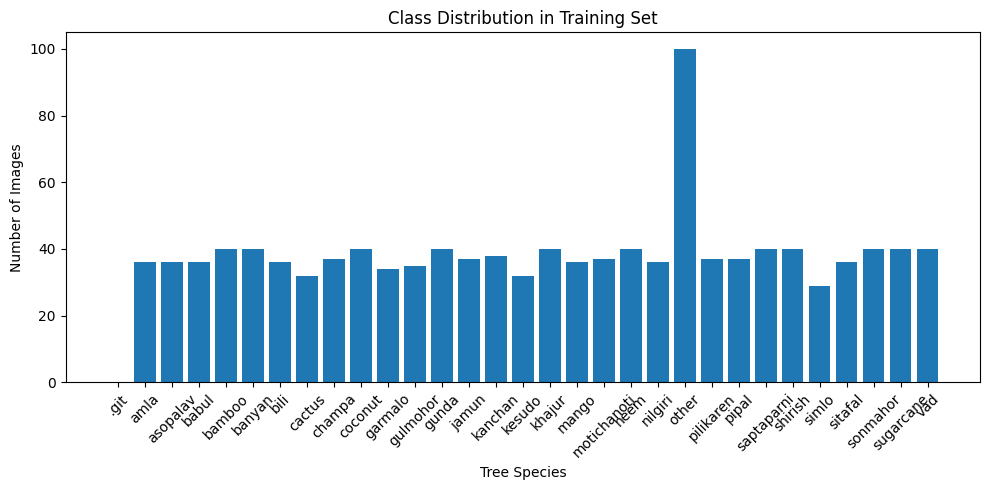

Class weights: {np.int32(1): np.float64(1.0898148148148148), np.int32(2): np.float64(1.0898148148148148), np.int32(3): np.float64(1.0898148148148148), np.int32(4): np.float64(0.9808333333333333), np.int32(5): np.float64(0.9808333333333333), np.int32(6): np.float64(1.0898148148148148), np.int32(7): np.float64(1.2260416666666667), np.int32(8): np.float64(1.0603603603603604), np.int32(9): np.float64(0.9808333333333333), np.int32(10): np.float64(1.1539215686274509), np.int32(11): np.float64(1.120952380952381), np.int32(12): np.float64(0.9808333333333333), np.int32(13): np.float64(1.0603603603603604), np.int32(14): np.float64(1.0324561403508772), np.int32(15): np.float64(1.2260416666666667), np.int32(16): np.float64(0.9808333333333333), np.int32(17): np.float64(1.0898148148148148), np.int32(18): np.float64(1.0603603603603604), np.int32(19): np.float64(0.9808333333333333), np.int32(20): np.float64(1.0898148148148148), np.int32(21): np.float64(0.3923333333333333), np.int32(22): np.float64(1.0

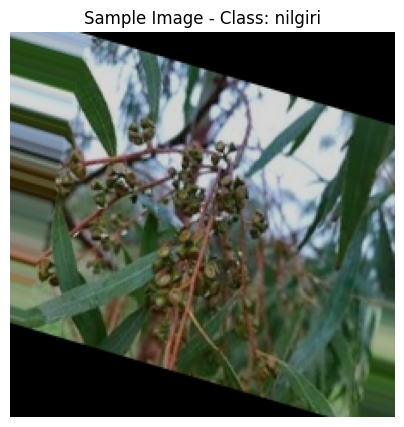

Building model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN model built successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,848,543 (60.46 MB)

 Trainable params: 15,842,143 (60.43 MB)

 Non-trainable params: 6,400 (25.00 KB)

Starting training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1: Setting learning rate to 0.000100
Epoch 1/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0546 - loss: 4.3057
Epoch 1: val_accuracy improved from -inf to 0.03249, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.0552 - loss: 4.2983 - val_accuracy: 0.0325 - val_loss: 3.6351 - learning_rate: 1.0000e-04
Epoch 2: Setting learning rate to 0.000280
Epoch 2/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.1444 - loss: 3.4548
Epoch 2: val_accuracy did not improve from 0.03249
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 812ms/step - accuracy: 0.1442 - loss: 3.4546 - val_accuracy: 0.0325 - val_loss: 3.9689 - learning_rate: 2.8000e-04
Epoch 3: Setting learning rate to 0.000460
Epoch 3/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.1780 - loss: 3.1155
Epoch 3: val_accuracy did not improve from 0.03249
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 802ms/step - accuracy: 0.1781 - loss: 3.1152 - val_accuracy: 0.0325 - val_loss: 4.5351 - learning_rate: 4.6000e-04
Epoch 4: Setting learning rate to 0.000640
Epoch 4/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.2264 - loss: 2.9272
Epoch 4: val_accuracy did not improve from 0.03249
37/37 ━━━━━━━━━━━━━━━━━━

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 831ms/step - accuracy: 0.3101 - loss: 2.6464 - val_accuracy: 0.0397 - val_loss: 5.0824 - learning_rate: 8.2000e-04
Epoch 6: Setting learning rate to 0.001000
Epoch 6/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.2821 - loss: 2.7140
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: val_accuracy did not improve from 0.03971
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 805ms/step - accuracy: 0.2816 - loss: 2.7149 - val_accuracy: 0.0397 - val_loss: 5.4272 - learning_rate: 0.0010
Epoch 7: Setting learning rate to 0.001000
Epoch 7/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.3058 - loss: 2.5041
Epoch 7: val_accuracy improved from 0.03971 to 0.04332, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 808ms/step - accuracy: 0.3054 - loss: 2.5054 - val_accuracy: 0.0433 - val_loss: 6.7491 - learning_rate: 0.0010
Epoch 8: Setting learning rate to 0.001000
Epoch 8/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.3287 - loss: 2.3963
Epoch 8: val_accuracy improved from 0.04332 to 0.05415, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 819ms/step - accuracy: 0.3286 - loss: 2.3964 - val_accuracy: 0.0542 - val_loss: 6.9302 - learning_rate: 0.0010
Epoch 9: Setting learning rate to 0.001000
Epoch 9/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.3746 - loss: 2.2168
Epoch 9: val_accuracy improved from 0.05415 to 0.11191, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 838ms/step - accuracy: 0.3744 - loss: 2.2174 - val_accuracy: 0.1119 - val_loss: 7.7554 - learning_rate: 0.0010
Epoch 10: Setting learning rate to 0.001000
Epoch 10/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.4125 - loss: 2.1243
Epoch 10: val_accuracy did not improve from 0.11191
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 805ms/step - accuracy: 0.4126 - loss: 2.1239 - val_accuracy: 0.0469 - val_loss: 7.9094 - learning_rate: 0.0010
Epoch 11: Setting learning rate to 0.001000
Epoch 11/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.4661 - loss: 1.7682
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: val_accuracy improved from 0.11191 to 0.11913, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 830ms/step - accuracy: 0.4658 - loss: 1.7704 - val_accuracy: 0.1191 - val_loss: 5.5352 - learning_rate: 0.0010
Epoch 12: Setting learning rate to 0.001000
Epoch 12/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.4591 - loss: 1.8839
Epoch 12: val_accuracy improved from 0.11913 to 0.14440, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 827ms/step - accuracy: 0.4586 - loss: 1.8857 - val_accuracy: 0.1444 - val_loss: 4.3492 - learning_rate: 0.0010
Epoch 13: Setting learning rate to 0.001000
Epoch 13/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.4741 - loss: 1.8149
Epoch 13: val_accuracy improved from 0.14440 to 0.15884, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 815ms/step - accuracy: 0.4745 - loss: 1.8138 - val_accuracy: 0.1588 - val_loss: 4.1824 - learning_rate: 0.0010
Epoch 14: Setting learning rate to 0.001000
Epoch 14/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.5372 - loss: 1.5880
Epoch 14: val_accuracy improved from 0.15884 to 0.28520, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 824ms/step - accuracy: 0.5365 - loss: 1.5901 - val_accuracy: 0.2852 - val_loss: 3.0191 - learning_rate: 0.0010
Epoch 15: Setting learning rate to 0.001000
Epoch 15/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.5400 - loss: 1.5867
Epoch 15: val_accuracy improved from 0.28520 to 0.33574, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 828ms/step - accuracy: 0.5399 - loss: 1.5877 - val_accuracy: 0.3357 - val_loss: 3.6932 - learning_rate: 0.0010
Epoch 16: Setting learning rate to 0.001000
Epoch 16/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.5640 - loss: 1.4549
Epoch 16: val_accuracy did not improve from 0.33574
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 802ms/step - accuracy: 0.5634 - loss: 1.4568 - val_accuracy: 0.3069 - val_loss: 2.9883 - learning_rate: 0.0010
Epoch 17: Setting learning rate to 0.001000
Epoch 17/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.5566 - loss: 1.4690
Epoch 17: val_accuracy improved from 0.33574 to 0.41516, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 805ms/step - accuracy: 0.5562 - loss: 1.4706 - val_accuracy: 0.4152 - val_loss: 2.6708 - learning_rate: 0.0010
Epoch 18: Setting learning rate to 0.001000
Epoch 18/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.5503 - loss: 1.4377
Epoch 18: val_accuracy did not improve from 0.41516
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 793ms/step - accuracy: 0.5504 - loss: 1.4384 - val_accuracy: 0.3971 - val_loss: 3.1108 - learning_rate: 0.0010
Epoch 19: Setting learning rate to 0.001000
Epoch 19/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.6093 - loss: 1.4116
Epoch 19: val_accuracy did not improve from 0.41516
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 796ms/step - accuracy: 0.6088 - loss: 1.4120 - val_accuracy: 0.2924 - val_loss: 3.5856 - learning_rate: 0.0010
Epoch 20: Setting learning rate to 0.001000
Epoch 20/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.5923 - loss: 1.3512
Epoch 20: val_accuracy improved from 0.41516 to 0.41877, saving model to best

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 836ms/step - accuracy: 0.5923 - loss: 1.3519 - val_accuracy: 0.4188 - val_loss: 3.0635 - learning_rate: 0.0010
Epoch 21: Setting learning rate to 0.001000
Epoch 21/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.6325 - loss: 1.1734
Epoch 21: val_accuracy did not improve from 0.41877
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 813ms/step - accuracy: 0.6316 - loss: 1.1765 - val_accuracy: 0.3971 - val_loss: 3.0171 - learning_rate: 0.0010
Epoch 22: Setting learning rate to 0.001000
Epoch 22/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.6401 - loss: 1.1450
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 22: val_accuracy did not improve from 0.41877
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 805ms/step - accuracy: 0.6397 - loss: 1.1466 - val_accuracy: 0.3610 - val_loss: 3.0625 - learning_rate: 0.0010
Epoch 23: Setting learning rate to 0.001000
Epoch 23/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.6747 - loss: 1.1365

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 829ms/step - accuracy: 0.6736 - loss: 1.1400 - val_accuracy: 0.4693 - val_loss: 2.3476 - learning_rate: 0.0010
Epoch 24: Setting learning rate to 0.001000
Epoch 24/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.6606 - loss: 1.0808
Epoch 24: val_accuracy did not improve from 0.46931
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 793ms/step - accuracy: 0.6606 - loss: 1.0815 - val_accuracy: 0.4585 - val_loss: 2.6198 - learning_rate: 0.0010
Epoch 25: Setting learning rate to 0.001000
Epoch 25/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.6834 - loss: 1.0349
Epoch 25: val_accuracy improved from 0.46931 to 0.49458, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 815ms/step - accuracy: 0.6835 - loss: 1.0353 - val_accuracy: 0.4946 - val_loss: 2.5865 - learning_rate: 0.0010
Epoch 26: Setting learning rate to 0.001000
Epoch 26/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.7234 - loss: 0.9788
Epoch 26: val_accuracy did not improve from 0.49458
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 799ms/step - accuracy: 0.7229 - loss: 0.9800 - val_accuracy: 0.4838 - val_loss: 2.5833 - learning_rate: 0.0010
Epoch 27: Setting learning rate to 0.001000
Epoch 27/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.7116 - loss: 0.9416
Epoch 27: val_accuracy did not improve from 0.49458
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 806ms/step - accuracy: 0.7109 - loss: 0.9440 - val_accuracy: 0.4260 - val_loss: 2.7173 - learning_rate: 0.0010
Epoch 28: Setting learning rate to 0.001000
Epoch 28/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.7206 - loss: 0.9065
Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 814ms/step - accuracy: 0.7406 - loss: 0.8539 - val_accuracy: 0.5162 - val_loss: 2.4488 - learning_rate: 0.0010
Epoch 31: Setting learning rate to 0.001000
Epoch 31/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.7834 - loss: 0.7738
Epoch 31: val_accuracy improved from 0.51625 to 0.51986, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 808ms/step - accuracy: 0.7826 - loss: 0.7755 - val_accuracy: 0.5199 - val_loss: 2.5640 - learning_rate: 0.0010
Epoch 32: Setting learning rate to 0.001000
Epoch 32/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.7542 - loss: 0.7899
Epoch 32: val_accuracy did not improve from 0.51986
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 815ms/step - accuracy: 0.7537 - loss: 0.7925 - val_accuracy: 0.4801 - val_loss: 2.6399 - learning_rate: 0.0010
Epoch 33: Setting learning rate to 0.001000
Epoch 33/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.7735 - loss: 0.7980
Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 33: val_accuracy did not improve from 0.51986
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 805ms/step - accuracy: 0.7732 - loss: 0.7976 - val_accuracy: 0.4621 - val_loss: 2.6224 - learning_rate: 0.0010
Epoch 34: Setting learning rate to 0.001000
Epoch 34/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.7969 - loss: 0.6997

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 824ms/step - accuracy: 0.8242 - loss: 0.5961 - val_accuracy: 0.5379 - val_loss: 2.2472 - learning_rate: 0.0010
Epoch 39: Setting learning rate to 0.001000
Epoch 39/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.8396 - loss: 0.5453
Epoch 39: val_accuracy did not improve from 0.53791
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 794ms/step - accuracy: 0.8391 - loss: 0.5470 - val_accuracy: 0.5307 - val_loss: 2.3131 - learning_rate: 0.0010
Epoch 40: Setting learning rate to 0.001000
Epoch 40/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.8416 - loss: 0.5222
Epoch 40: val_accuracy did not improve from 0.53791
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 798ms/step - accuracy: 0.8412 - loss: 0.5237 - val_accuracy: 0.4946 - val_loss: 2.3717 - learning_rate: 0.0010
Epoch 41: Setting learning rate to 0.001000
Epoch 41/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.8634 - loss: 0.4632
Epoch 41: val_accuracy did not improve from 0.53791
37/37 ━━━━━━━━━━━━━━━━━━━

37/37 ━━━━━━━━━━━━━━━━━━━━ 48s 984ms/step - accuracy: 0.8925 - loss: 0.3998 - val_accuracy: 0.5523 - val_loss: 2.3927 - learning_rate: 0.0010
Epoch 51: Setting learning rate to 0.001000
Epoch 51/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.9026 - loss: 0.3331
Epoch 51: val_accuracy did not improve from 0.55235
37/37 ━━━━━━━━━━━━━━━━━━━━ 34s 922ms/step - accuracy: 0.9024 - loss: 0.3343 - val_accuracy: 0.4549 - val_loss: 3.0508 - learning_rate: 0.0010
Epoch 52: Setting learning rate to 0.001000
Epoch 52/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.9183 - loss: 0.3025
Epoch 52: val_accuracy improved from 0.55235 to 0.56679, saving model to best_tree_cnn.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 862ms/step - accuracy: 0.9178 - loss: 0.3036 - val_accuracy: 0.5668 - val_loss: 2.2534 - learning_rate: 0.0010
Epoch 53: Setting learning rate to 0.001000
Epoch 53/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9147 - loss: 0.2812
Epoch 53: val_accuracy did not improve from 0.56679
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 831ms/step - accuracy: 0.9145 - loss: 0.2819 - val_accuracy: 0.5199 - val_loss: 2.3466 - learning_rate: 0.0010
Epoch 54: Setting learning rate to 0.001000
Epoch 54/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.9111 - loss: 0.3200
Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 54: val_accuracy did not improve from 0.56679
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 887ms/step - accuracy: 0.9111 - loss: 0.3193 - val_accuracy: 0.5090 - val_loss: 2.6512 - learning_rate: 0.0010
Epoch 55: Setting learning rate to 0.001000
Epoch 55/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9042 - loss: 0.3088

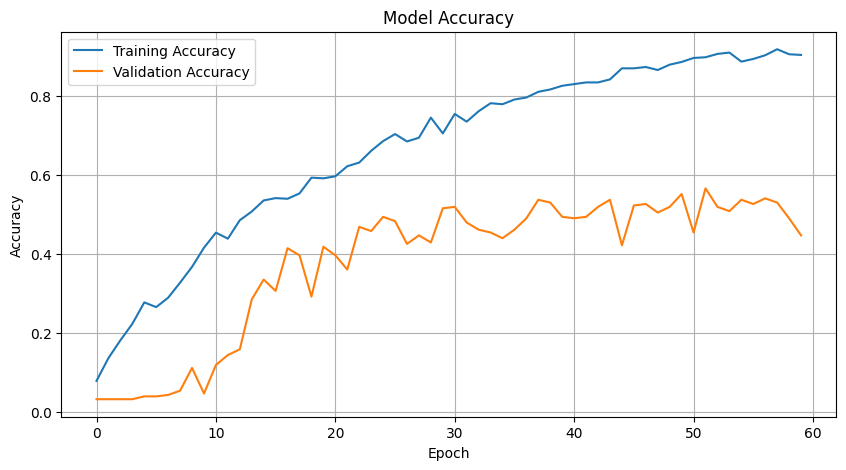

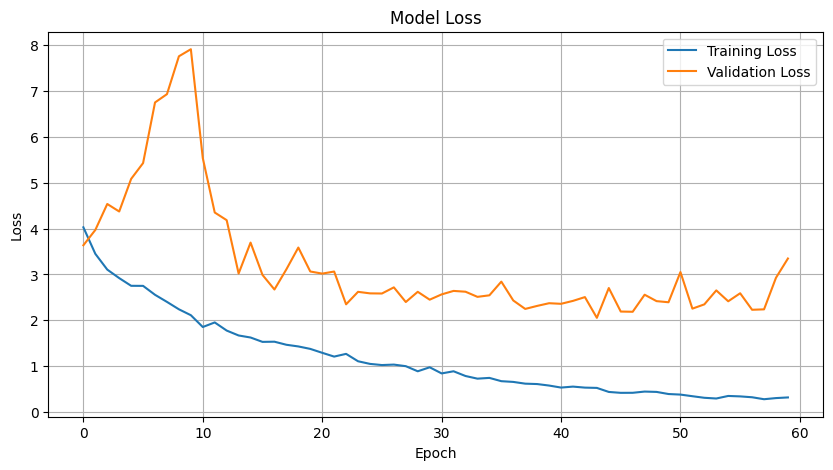

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def build_my_cnn(num_classes):
    """
    Builds an enhanced 5-block CNN for tree species classification.
    """
    model = Sequential([
        # Block 1: Basic edge and texture detection
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),

        # Block 2: More complex patterns
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        # Block 3: Leaf and bark details
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # Block 4: High-level features
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # Block 5: Deep feature extraction
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Classification layers
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.0001)  # Start with lower LR for warmup
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    print("CNN model built successfully.")
    model.summary()
    return model

def warmup_schedule(epoch, warmup_epochs=5, target_lr=0.001):
    """
    Learning rate scheduler for warmup phase.
    """
    initial_lr = 0.0001
    if epoch < warmup_epochs:
        lr = initial_lr + (target_lr - initial_lr) * (epoch / warmup_epochs)
    else:
        lr = target_lr
    print(f"Epoch {epoch + 1}: Setting learning rate to {lr:.6f}")
    return lr

def train_model():
    """
    Trains the CNN model with enhanced settings and evaluates performance.
    """
    global data_dir  # Use data_dir from Cell 1
    if not os.path.exists(data_dir):
        print(f"Error: Dataset directory not found at {data_dir}")
        return None, None

    print("Loading data...")
    train_gen, val_gen, class_weights = create_data_generators(data_dir)

    if not train_gen or not val_gen:
        print("Error: Failed to create data generators.")
        return None, None

    print("Visualizing a sample training image...")
    x, y = next(train_gen)
    class_names = [name for name, idx in sorted(train_gen.class_indices.items(), key=lambda x: x[1])]
    plt.figure(figsize=(5, 5))
    plt.imshow(x[0])
    plt.title(f"Sample Image - Class: {class_names[np.argmax(y[0])]}")
    plt.axis('off')
    plt.show()

    print("Building model...")
    model = build_my_cnn(num_classes=train_gen.num_classes)

    # Define callbacks
    early_stop = EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True,
        verbose=1
    )
    lr_reducer = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    checkpoint = ModelCheckpoint(
        'best_tree_cnn.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    tensorboard = TensorBoard(
        log_dir=f'logs/fit/{datetime.now().strftime("%Y%m%d-%H%M%S")}',
        histogram_freq=1,
        write_graph=True,
        write_images=True
    )
    warmup = LearningRateScheduler(lambda epoch: warmup_schedule(epoch, warmup_epochs=5, target_lr=0.001))

    print("Starting training...")
    history = model.fit(
        train_gen,
        epochs=60,
        validation_data=val_gen,
        class_weight=class_weights,
        callbacks=[warmup, early_stop, lr_reducer, checkpoint, tensorboard],
        verbose=1
    )

    print("Evaluating model...")
    val_loss, val_accuracy = model.evaluate(val_gen)
    print(f"Final Validation Accuracy: {val_accuracy*100:.2f}%")

    return model, history

# Run training and visualize
print("Enhanced Tree Species CNN Training Script")
model, history = train_model()

if history:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:
a_loss, cnn_accuracy = model.evaluate(train_gen)
print(f"Final Validation Accuracy: {cnn_accuracy*100:.2f}%")

NameError: name 'train_gen' is not defined